Average Z coordinate: 3.3963

Maximum deviation from average Z plane: 0.5812

Original transformed positions:
Camera 0: [0.99382967 2.59333162 2.95762625] (deviation from avg Z: 0.4387)
Camera 1: [-1.84272602  0.87304613  3.97750837] (deviation from avg Z: 0.5812)
Camera 2: [ 1.38108843 -2.52164672  3.08849918] (deviation from avg Z: 0.3078)
Camera 3: [ 3.17016849 -0.55979842  3.5615908 ] (deviation from avg Z: 0.1653)

Projected positions (on average Z plane):
Camera 0: [0.99382967 2.59333162 3.39630615]
Camera 1: [-1.84272602  0.87304613  3.39630615]
Camera 2: [ 1.38108843 -2.52164672  3.39630615]
Camera 3: [ 3.17016849 -0.55979842  3.39630615]


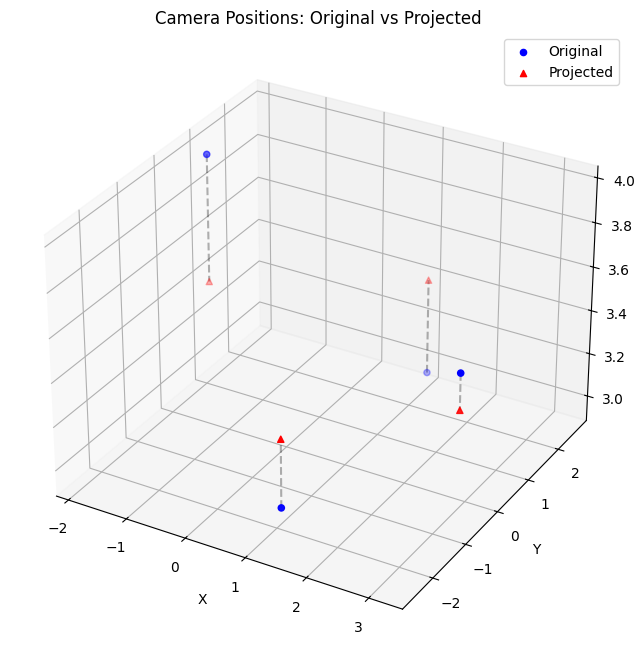


Best-fit plane normal vector: [0.12686497 0.03929647 0.99114129]
Angle between best-fit plane and XY plane: 7.63 degrees


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def pose_to_matrix(pose):
    """Convert R, t pose to 4x4 transformation matrix"""
    matrix = np.eye(4)
    matrix[:3, :3] = np.array(pose['R'])
    matrix[:3, 3] = np.array(pose['t'])
    return matrix

# Input data
poses = [
    {
        "R": [[1,0,0],[0,1,0],[0,0,1]],
        "t": [0,0,0]
    },
    {
        "R": [[-0.0008290000610233772,-0.7947131755287576,0.6069845808584402],
              [0.7624444396180684,0.3922492478955913,0.5146056781855716],
              [-0.6470531579819294,0.46321862674804054,0.6055994671226776]],
        "t": [-2.6049886186449047,-2.173986915510569,0.7303458563542193]
    },
    {
        "R": [[-0.9985541623963866,-0.028079891357569067,-0.045837806036037466],
              [-0.043210651917521686,-0.08793122558361385,0.9951888962042462],
              [-0.03197537054848707,0.995730696156702,0.0865907408997996]],
        "t": [0.8953888630067902,-3.4302652822708373,3.70967106300893]
    },
    {
        "R": [[-0.4499864100408215,0.6855400696798954,-0.5723172578577878],
              [-0.7145273934510732,0.10804105689305427,0.6912146801345055],
              [0.5356891214002657,0.7199735709654319,0.4412201517663212]],
        "t": [2.50141072072536,-2.313616767292231,1.8529907514099284]
    }
]

to_world_matrix = np.array([
    [0.9941338485260931,0.0986512964608827,-0.04433748889242502,0.9938296704767513],
    [-0.0986512964608827,0.659022672138982,-0.7456252673517598,2.593331619023365],
    [0.04433748889242498,-0.7456252673517594,-0.6648888236128887,2.9576262456228286],
    [0,0,0,1]
])

# Transform each pose
transformed_positions = []
for pose in poses:
    # Convert pose to matrix
    pose_matrix = pose_to_matrix(pose)
    
    # Transform pose
    transformed_matrix = to_world_matrix @ pose_matrix
    
    # Extract position
    position = transformed_matrix[:3, 3]
    transformed_positions.append(position)

transformed_positions = np.array(transformed_positions)

# Calculate average Z coordinate
avg_z = np.mean(transformed_positions[:, 2])
print(f"Average Z coordinate: {avg_z:.4f}")

# Project all points to average Z plane
projected_positions = transformed_positions.copy()
projected_positions[:, 2] = avg_z

# Calculate deviations from average Z plane
deviations = np.abs(transformed_positions[:, 2] - avg_z)
max_deviation = np.max(deviations)
print(f"\nMaximum deviation from average Z plane: {max_deviation:.4f}")

print("\nOriginal transformed positions:")
for i, pos in enumerate(transformed_positions):
    print(f"Camera {i}: {pos} (deviation from avg Z: {deviations[i]:.4f})")

print("\nProjected positions (on average Z plane):")
for i, pos in enumerate(projected_positions):
    print(f"Camera {i}: {pos}")

# Visualize the camera positions
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original positions
ax.scatter(transformed_positions[:, 0], 
          transformed_positions[:, 1], 
          transformed_positions[:, 2], 
          c='blue', marker='o', label='Original')

# Plot projected positions
ax.scatter(projected_positions[:, 0], 
          projected_positions[:, 1], 
          projected_positions[:, 2], 
          c='red', marker='^', label='Projected')

# Draw lines between original and projected positions
for orig, proj in zip(transformed_positions, projected_positions):
    ax.plot([orig[0], proj[0]], 
            [orig[1], proj[1]], 
            [orig[2], proj[2]], 
            'k--', alpha=0.3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Camera Positions: Original vs Projected')
plt.show()

# Additional analysis: Calculate the plane normal
def fit_plane(points):
    """Fit a plane to the points and return the normal vector"""
    centroid = np.mean(points, axis=0)
    centered_points = points - centroid
    U, S, Vt = np.linalg.svd(centered_points)
    normal = Vt[-1]
    return normal / np.linalg.norm(normal)

# Fit plane to original positions
plane_normal = fit_plane(transformed_positions)
print("\nBest-fit plane normal vector:", plane_normal)

# Calculate angle between best-fit plane normal and Z-axis
z_axis = np.array([0, 0, 1])
angle = np.arccos(np.dot(plane_normal, z_axis))
print(f"Angle between best-fit plane and XY plane: {np.degrees(angle):.2f} degrees")

In [ ]:
import numpy as np
import pyvista as pv
import ipywidgets as widgets
from IPython.display import display
from typing import List, Dict, Tuple

class CameraVisualizer:
    def __init__(self):
        # Input data
        self.poses = [
            {
                "R": [[1,0,0],[0,1,0],[0,0,1]],
                "t": [0,0,0]
            },
            {
                "R": [[-0.0008290000610233772,-0.7947131755287576,0.6069845808584402],
                      [0.7624444396180684,0.3922492478955913,0.5146056781855716],
                      [-0.6470531579819294,0.46321862674804054,0.6055994671226776]],
                "t": [-2.6049886186449047,-2.173986915510569,0.7303458563542193]
            },
            {
                "R": [[-0.9985541623963866,-0.028079891357569067,-0.045837806036037466],
                      [-0.043210651917521686,-0.08793122558361385,0.9951888962042462],
                      [-0.03197537054848707,0.995730696156702,0.0865907408997996]],
                "t": [0.8953888630067902,-3.4302652822708373,3.70967106300893]
            },
            {
                "R": [[-0.4499864100408215,0.6855400696798954,-0.5723172578577878],
                      [-0.7145273934510732,0.10804105689305427,0.6912146801345055],
                      [0.5356891214002657,0.7199735709654319,0.4412201517663212]],
                "t": [2.50141072072536,-2.313616767292231,1.8529907514099284]
            }
        ]
        
        self.to_world_matrix = np.array([
            [0.9941338485260931,0.0986512964608827,-0.04433748889242502,0.9938296704767513],
            [-0.0986512964608827,0.659022672138982,-0.7456252673517598,2.593331619023365],
            [0.04433748889242498,-0.7456252673517594,-0.6648888236128887,2.9576262456228286],
            [0,0,0,1]
        ])
        
        # Initialize visualization parameters
        self.show_original = True
        self.show_projected = True
        self.camera_scale = 0.5
        self.show_connecting_lines = True
        
        # Process the camera poses
        self.process_poses()
        
        # Create the plotter
        self.pl = pv.Plotter(notebook=True)
        
        # Create widgets
        self.create_widgets()
        
    def pose_to_matrix(self, pose: Dict) -> np.ndarray:
        """Convert R, t pose to 4x4 transformation matrix"""
        matrix = np.eye(4)
        matrix[:3, :3] = np.array(pose['R'])
        matrix[:3, 3] = np.array(pose['t'])
        return matrix
    
    def create_camera_mesh(self, scale: float = 1.0) -> pv.PolyData:
        """Create a camera frustum mesh"""
        # Create camera frustum vertices
        vertices = np.array([
            [0, 0, 0],      # 0: camera center
            [1, 0.8, 2],    # 1: top right
            [1, -0.8, 2],   # 2: bottom right
            [-1, -0.8, 2],  # 3: bottom left
            [-1, 0.8, 2],   # 4: top left
        ]) * scale
        
        # Define faces using vertex indices
        # Each face is defined by [n, v1, v2, ..., vn] where n is the number of vertices in the face
        faces = np.array([
            [3, 0, 1, 2],    # right face
            [3, 0, 2, 3],    # bottom face
            [3, 0, 3, 4],    # left face
            [3, 0, 4, 1],    # top face
            [4, 1, 2, 3, 4]  # front face
        ], dtype=np.int32)
        
        # Flatten the faces array with the number of vertices per face
        faces_flatten = []
        for face in faces:
            faces_flatten.extend(face)
        
        return pv.PolyData(vertices, np.array(faces_flatten))
    
    def process_poses(self):
        """Process camera poses to get original and projected positions"""
        self.transformed_positions = []
        self.transformed_matrices = []
        
        for pose in self.poses:
            pose_matrix = self.pose_to_matrix(pose)
            transformed_matrix = self.to_world_matrix @ pose_matrix
            self.transformed_matrices.append(transformed_matrix)
            self.transformed_positions.append(transformed_matrix[:3, 3])
            
        self.transformed_positions = np.array(self.transformed_positions)
        
        # Calculate average Z and projected positions
        self.avg_z = np.mean(self.transformed_positions[:, 2])
        self.projected_positions = self.transformed_positions.copy()
        self.projected_positions[:, 2] = self.avg_z
        
        # Calculate deviations
        self.deviations = np.abs(self.transformed_positions[:, 2] - self.avg_z)
        
    def update_visualization(self, *args):
        """Update the visualization based on current widget states"""
        self.pl.clear()
        
        # Add coordinate axes
        self.pl.add_axes()
        
        # Add original camera positions
        if self.show_original:
            for i, (pos, matrix) in enumerate(zip(self.transformed_positions, self.transformed_matrices)):
                camera_mesh = self.create_camera_mesh(self.camera_scale)
                camera_mesh.transform(matrix)
                self.pl.add_mesh(camera_mesh, color='blue', opacity=0.7, label=f'Camera {i}')
                
                # Add a point at camera center
                point = pv.PolyData(pos)
                self.pl.add_mesh(point, color='blue', point_size=10, render_points_as_spheres=True)
        
        # Add projected camera positions
        if self.show_projected:
            for i, pos in enumerate(self.projected_positions):
                # Create a copy of the transformation matrix with modified position
                proj_matrix = self.transformed_matrices[i].copy()
                proj_matrix[:3, 3] = pos
                
                camera_mesh = self.create_camera_mesh(self.camera_scale)
                camera_mesh.transform(proj_matrix)
                self.pl.add_mesh(camera_mesh, color='red', opacity=0.7)
                
                # Add a point at projected camera center
                point = pv.PolyData(pos)
                self.pl.add_mesh(point, color='red', point_size=10, render_points_as_spheres=True)
        
        # Add connecting lines
        if self.show_connecting_lines:
            for orig, proj in zip(self.transformed_positions, self.projected_positions):
                line = pv.Line(orig, proj)
                self.pl.add_mesh(line, color='gray', line_width=2, opacity=0.5)
        
        # Add reference grid at average Z
        grid = pv.Plane(center=(0, 0, self.avg_z), direction=(0, 0, 1), i_size=10, j_size=10)
        self.pl.add_mesh(grid, opacity=0.3, color='lightgray')
        
        self.pl.show_grid()
        self.pl.reset_camera()
        
    def create_widgets(self):
        """Create interactive widgets"""
        self.original_checkbox = widgets.Checkbox(
            value=True,
            description='Show Original Cameras',
            disabled=False
        )
        self.original_checkbox.observe(self.update_visualization, names='value')
        
        self.projected_checkbox = widgets.Checkbox(
            value=True,
            description='Show Projected Cameras',
            disabled=False
        )
        self.projected_checkbox.observe(self.update_visualization, names='value')
        
        self.lines_checkbox = widgets.Checkbox(
            value=True,
            description='Show Connecting Lines',
            disabled=False
        )
        self.lines_checkbox.observe(self.update_visualization, names='value')
        
        self.scale_slider = widgets.FloatSlider(
            value=0.5,
            min=0.1,
            max=2.0,
            step=0.1,
            description='Camera Scale:',
            disabled=False,
            continuous_update=False
        )
        self.scale_slider.observe(self.update_camera_scale, names='value')
        
        # Create info text
        self.info_text = widgets.HTML(
            value=f"Average Z: {self.avg_z:.4f}<br>Max Deviation: {np.max(self.deviations):.4f}"
        )
        
        # Layout widgets
        self.widget_container = widgets.VBox([
            self.original_checkbox,
            self.projected_checkbox,
            self.lines_checkbox,
            self.scale_slider,
            self.info_text
        ])
    
    def update_camera_scale(self, change):
        """Update camera scale"""
        self.camera_scale = change.new
        self.update_visualization()
    
    def show(self):
        """Display the visualization and widgets"""
        display(self.widget_container)
        self.update_visualization()
        return self.pl

# Create and show visualization
viz = CameraVisualizer()
viz.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.